In [17]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as lm
import statsmodels.api as sm

In [18]:
data = pd.read_csv("C:/Users/sudha/Downloads/laptop_prices.csv")
data

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Windows 10,1.80,638.00,Full HD,1920,...,No,Intel,2.5,Core i7 6500U,128,0,SSD,No,Intel,HD Graphics 520
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Windows 10,1.50,229.00,Standard,1366,...,No,Intel,1.6,Celeron Dual Core N3050,64,0,Flash Storage,No,Intel,HD Graphics
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,Windows 10,2.19,764.00,Standard,1366,...,No,Intel,2.5,Core i7 6500U,1024,0,HDD,No,AMD,Radeon R5 M330


In [19]:
# Head rows of the Dataset
data.head(10)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
5,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,400.00,Standard,1366,...,No,AMD,3.0,A9-Series 9420,500,0,HDD,No,AMD,Radeon R5
6,Apple,MacBook Pro,Ultrabook,15.4,16,Mac OS X,2.04,2139.97,Standard,2880,...,Yes,Intel,2.2,Core i7,256,0,Flash Storage,No,Intel,Iris Pro Graphics
7,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,1158.70,Standard,1440,...,No,Intel,1.8,Core i5,256,0,Flash Storage,No,Intel,HD Graphics 6000
8,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,1.30,1495.00,Full HD,1920,...,No,Intel,1.8,Core i7 8550U,512,0,SSD,No,Nvidia,GeForce MX150
9,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,1.60,770.00,Full HD,1920,...,No,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620


In [20]:
# Checking for the null values
data.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [23]:
# Checking the numericals values
data.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [24]:
price_column = data['Price_euros']

# Calculate the first quartile (Q1)
q1 = price_column.quantile(0.25)

# Calculate the third quartile (Q3)
q3 = price_column.quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = q3 - q1

print(f"The Interquartile Range (IQR) of the price column is: {iqr}")

The Interquartile Range (IQR) of the price column is: 887.5


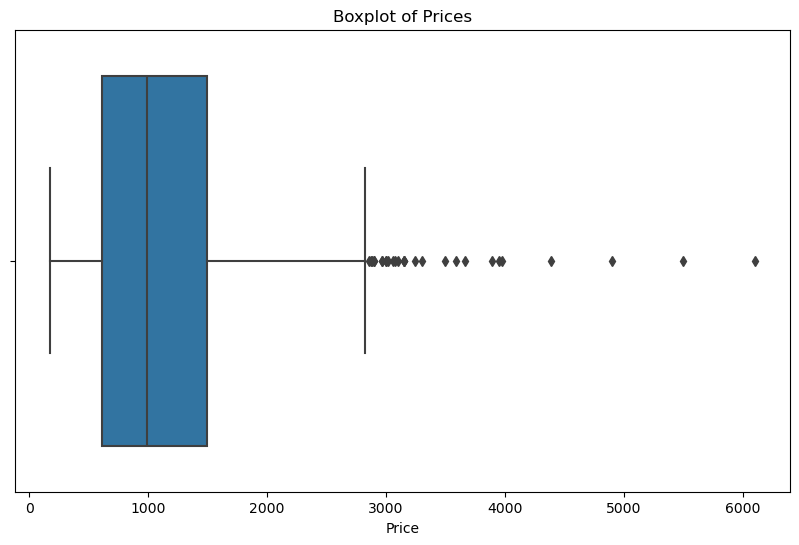

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Price_euros'])

plt.title('Boxplot of Prices')
plt.xlabel('Price')

plt.show()

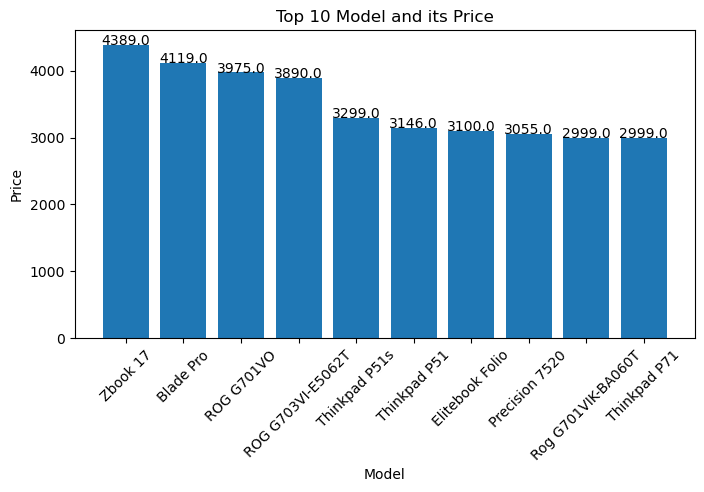

In [26]:
result = data.groupby(['Product'], as_index=False)['Price_euros'].mean().sort_values(by='Price_euros', ascending=False)

# Selecting the top 10 Model and Prices
top_10 = result.head(10)

Model = top_10['Product']
Price = top_10['Price_euros']

# Creating the bar graph
plt.figure(figsize=(8, 4))  
# Adjust the figure size as per your preference
plt.bar(Model, Price)

# Adding bar labels
for i, value in enumerate(Price):
    plt.text(i, value, str(round(value, 2)), ha="center")

# Adding labels and title
plt.xlabel("Model")
plt.ylabel("Price")
plt.title('Top 10 Model and its Price')

# Rotating the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Displaying the graph
plt.show()

OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64


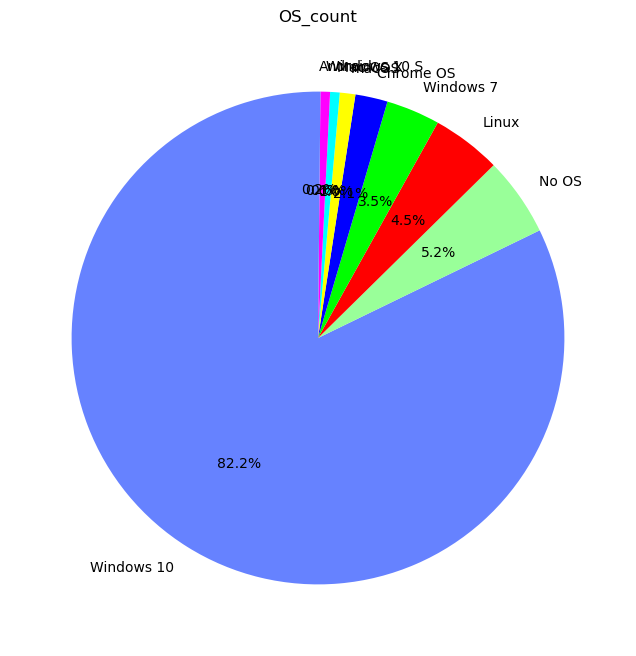

In [43]:
OS_count = data['OS'].value_counts()

print(OS_count)



# Create a pie chart
plt.figure(figsize=(15, 8))

plt.pie(OS_count, labels=OS_count.index, autopct="%1.1f%%", startangle=90, colors=[ '#6682FF','#99FF99','#FF0000','#00FF00','#0000FF','#FFFF00','#00FFFF','#FF00FF'])

plt.title('OS_count')

# Display the pie chart
plt.show()

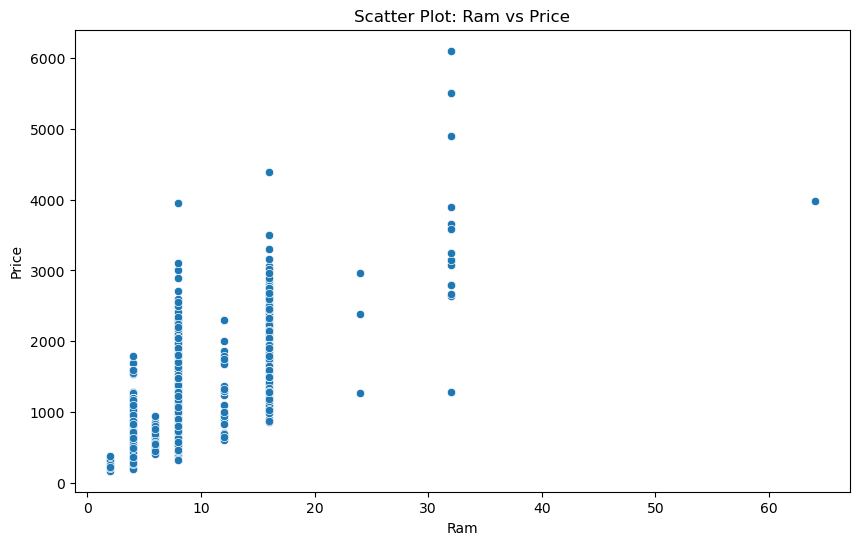

In [28]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Ram', y='Price_euros', data=data)
plt.title('Scatter Plot: Ram vs Price')

plt.xlabel('Ram')
plt.ylabel('Price')

plt.show()

In [29]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [31]:
# Split features and target variable
X = data.drop(columns=['Price_euros', 'Product'])
y = data['Price_euros']

In [32]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Select categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [34]:
# Define preprocessing for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [35]:
# Combine preprocessing in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [36]:
# Build a pipeline with a model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [37]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq',
       'PrimaryStorage', 'SecondaryStorage'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Company', 'TypeName', 'OS', 'Screen', 'Touchscreen', 'IPSpanel',
       'RetinaDisplay', 'CPU_company', 'CPU_model', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [38]:
# Make predictions
y_pred = model.predict(X_test)

In [39]:
# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

RMSE: 260.42
MAE: 175.56
R²: 0.86


In [40]:
# Linear Regression
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_pred)

print(f"Linear Model RMSE: {linear_rmse:.2f}")
print(f"Linear Model R²: {linear_r2:.2f}")

Linear Model RMSE: 307.10
Linear Model R²: 0.81
